# Algorithmic Trading Model with Dual Moving Average Crossover Using Python Take 1
### David Lowe
### April 2, 2020

SUMMARY: The purpose of this project is to construct an algorithmic trading model and document the end-to-end steps using a template.

INTRODUCTION: This algorithmic trading model uses the 20-day and 50-day moving averages to generate trading signals.

In this Take1 iteration, we will construct the code modules to cover the tasks of downloading the daily price information for a stock symbol. We will use the stock data acquired to fit a trading model in future iterations of the project.

ANALYSIS: Not available yet. To be developed further.

CONCLUSION: Not available yet. To be developed further.

Dataset ML Model: Time series forecast with numerical attributes

Dataset Used: Various sources as illustrated below.

Dataset Reference: Various sources as documented below.

An algorithmic trading modeling project generally can be broken down into about five major tasks:

1. Prepare Environment
2. Acquire and Pre-Process Data
3. Develop Strategy and Fit Models
4. Backtest and Evaluate Models
5. Finalize Model

## Task 1. Prepare Environment

In [1]:
# Create the random seed number for reproducible results
seedNum = 888

In [2]:
import os
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import json
import requests
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from datetime import datetime

/opt/conda/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
# Begin the timer for the script processing
startTimeScript = datetime.now()

# Set up the number of CPU cores available for multi-thread processing
n_jobs = -1

# Set up the verbose flag to print detailed messages for debugging (setting True will activate!)
verbose = False

In [4]:
start_date = datetime(2015, 3, 1)
print("Starting date:", start_date)
end_date = datetime.now()
print("Ending date:", end_date)
stock_symbol = 'MSFT'

Starting date: 2015-03-01 00:00:00
Ending date: 2020-03-25 13:51:24.524369


## Task 2. Acquire and Pre-Process Data

### 2.a) Federal Reserve Economic Data (FRED)

In [5]:
fred_data = 'DGS10'
fred_series = pdr.DataReader(fred_data, 'fred', start_date, end_date)
fred_series.head(10)

,DGS10
DATE,
2015-03-02,2.08
2015-03-03,2.12
2015-03-04,2.12
2015-03-05,2.11
2015-03-06,2.24
2015-03-09,2.20
2015-03-10,2.14
2015-03-11,2.11
2015-03-12,2.10


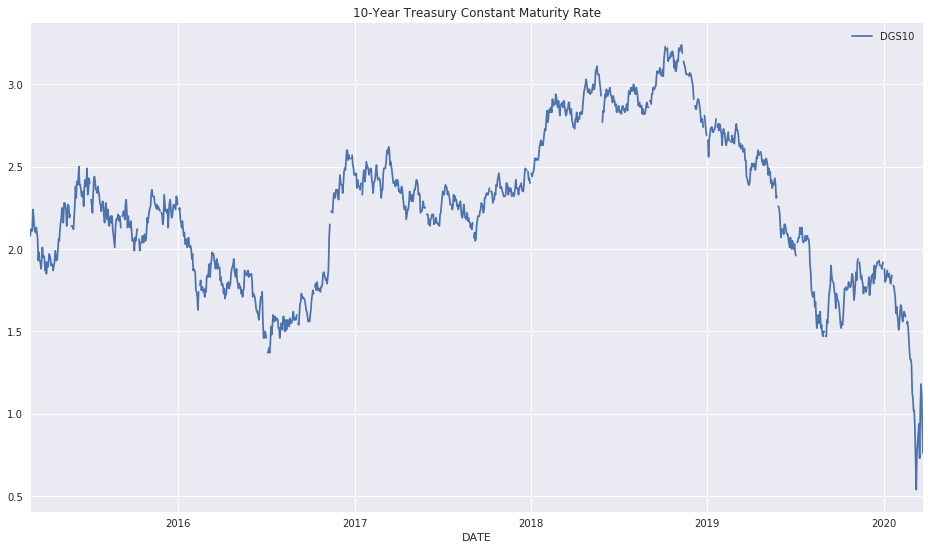

In [6]:
title_string = '10-Year Treasury Constant Maturity Rate'
fred_series.plot(figsize=(16,9), title=title_string)
plt.show()

### 2.b) Alpha Vantage

In [7]:
# Check and see whether the API key is available
alphavantage_key = os.environ.get('ALPHAVANTAGE_API')
if (alphavantage_key==None): sys.exit("API key for Alpha Vantage not available. Script Processing Aborted!!!")

alphavantage_url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s" % (stock_symbol, alphavantage_key)

In [8]:
response = requests.get(alphavantage_url)
alpha_dict = json.loads(response.text)
print(len(alpha_dict['Time Series (Daily)']), 'data points retrieved from the API call.')
if (verbose): print(alphadict)

5033 data points retrieved from the API call.


In [9]:
stock_alpha = pd.DataFrame(alpha_dict['Time Series (Daily)']).T
stock_alpha.index = pd.to_datetime(stock_alpha.index)
stock_alpha = stock_alpha.sort_index(ascending = True)
stock_alpha.columns = ['open', 'high', 'low', 'close', 'volume']
stock_alpha = stock_alpha.astype(float)
stock_alpha.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2000-03-23 to 2020-03-25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5033 non-null   float64
 1   high    5033 non-null   float64
 2   low     5033 non-null   float64
 3   close   5033 non-null   float64
 4   volume  5033 non-null   float64
dtypes: float64(5)
memory usage: 235.9 KB


In [10]:
stock_alpha.head(10)

,open,high,low,close,volume
2000-03-23,106.81,112.87,106.62,111.87,74112000.0
2000-03-24,112.62,115.00,109.56,111.69,56098400.0
2000-03-27,107.77,108.25,103.94,104.06,55717000.0
2000-03-28,103.62,107.44,102.37,104.31,40557200.0
2000-03-29,105.19,108.94,105.12,107.19,32181900.0
2000-03-30,106.19,108.62,102.50,103.37,32089200.0
2000-03-31,106.00,108.25,104.12,106.25,32140700.0
2000-04-03,94.44,96.50,90.00,90.87,130059100.0
2000-04-04,91.56,92.00,84.94,88.56,90622200.0
2000-04-05,88.25,88.50,85.87,86.37,41443800.0


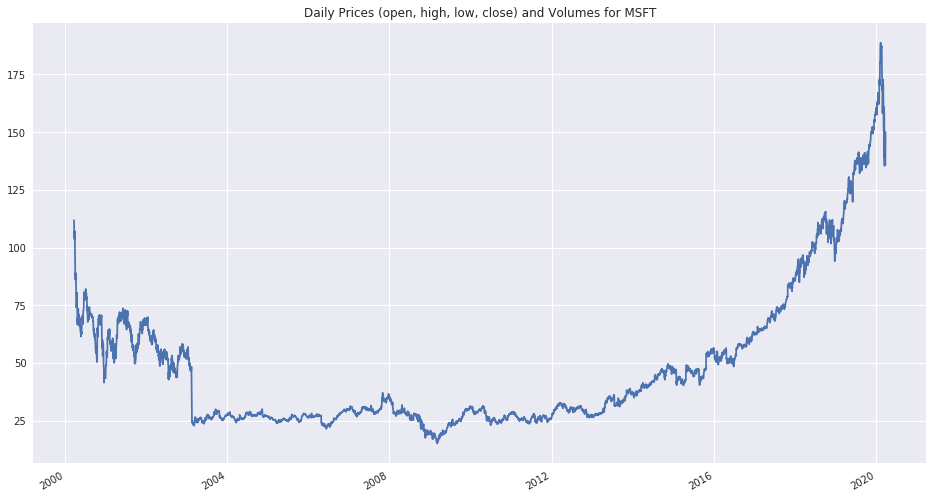

In [11]:
title_string = alpha_dict['Meta Data']['1. Information'] + ' for ' + alpha_dict['Meta Data']['2. Symbol']
stock_alpha['close'].plot(figsize=(16,9), title=title_string)
plt.show()

### 2.c) Yahoo Finance

In [12]:
import yfinance as yf
yf.pdr_override()
stock_yahoo = pdr.get_data_yahoo(stock_symbol, start_date, end_date)
stock_yahoo.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-03-02,43.669998,44.189999,43.549999,43.880001,39.565929,31924000
2015-03-03,43.560001,43.830002,43.090000,43.279999,39.024906,31748600
2015-03-04,43.009998,43.209999,42.880001,43.060001,38.826534,25748700
2015-03-05,43.070000,43.240002,42.820000,43.110001,38.871628,23193500
2015-03-06,43.000000,43.110001,42.150002,42.360001,38.195362,36248800
2015-03-09,42.189999,43.130001,42.189999,42.849998,38.637188,32108000
2015-03-10,42.349998,42.709999,42.029999,42.029999,37.897800,39159700
2015-03-11,42.310001,42.369999,41.840000,41.980000,37.852718,32215300
2015-03-12,41.330002,41.650002,40.860001,41.020000,36.987106,59992500


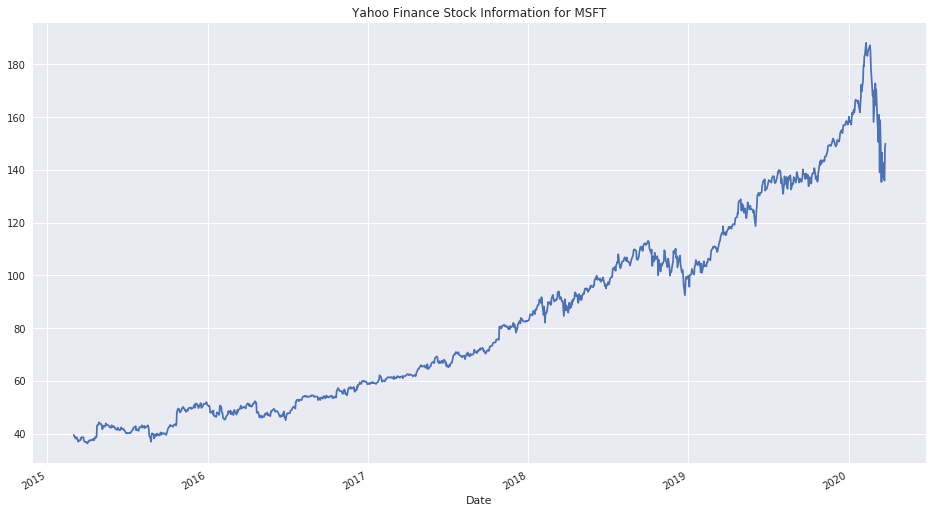

In [13]:
title_string = 'Yahoo Finance Stock Information for ' + stock_symbol
stock_yahoo['Adj Close'].plot(figsize=(16,9), title=title_string)
plt.show()

### 2.d) Quandl

In [14]:
# import quandl

# Check and see whether the API key is available
quandl_key = os.environ.get('QUANDL_API')
if (quandl_key==None): sys.exit("API key for Quandl not available. Script Processing Aborted!!!")

quandl_url = "https://www.quandl.com/api/v3/datasets/EOD/%s.json?api_key=%s" % (stock_symbol, quandl_key)

In [15]:
response = requests.get(quandl_url)
quandl_dict = json.loads(response.text)
print(len(quandl_dict), 'data points retrieved from the API call.')
if (verbose): print(quandl_dict)

1 data points retrieved from the API call.


In [16]:
stock_quandl = pd.DataFrame(quandl_dict['dataset']['data'])
stock_quandl.columns = quandl_dict['dataset']['column_names']
stock_quandl.set_index('Date', inplace=True)
stock_quandl = stock_quandl.sort_index(ascending = True)
stock_quandl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 2013-09-03 to 2017-12-28
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1090 non-null   float64
 1   High        1090 non-null   float64
 2   Low         1090 non-null   float64
 3   Close       1090 non-null   float64
 4   Volume      1090 non-null   float64
 5   Dividend    1090 non-null   float64
 6   Split       1090 non-null   float64
 7   Adj_Open    1090 non-null   float64
 8   Adj_High    1090 non-null   float64
 9   Adj_Low     1090 non-null   float64
 10  Adj_Close   1090 non-null   float64
 11  Adj_Volume  1090 non-null   float64
dtypes: float64(12)
memory usage: 110.7+ KB


In [17]:
stock_quandl.head(10)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,31.7500,32.07,31.290,31.880,154507000.0,0.0,1.0,27.559502,27.837267,27.160215,27.672344,154507000.0
2013-09-04,31.3900,31.47,31.110,31.195,142320600.0,0.0,1.0,27.247017,27.316458,27.003972,27.077754,142320600.0
2013-09-05,31.1000,31.44,30.950,31.235,71644900.0,0.0,1.0,26.995292,27.290417,26.865090,27.112474,71644900.0
2013-09-06,31.3100,31.39,31.130,31.152,75434900.0,0.0,1.0,27.177575,27.247017,27.021333,27.040429,75434900.0
2013-09-09,31.2208,31.79,31.200,31.655,49628500.0,0.0,1.0,27.100148,27.594223,27.082094,27.477041,49628500.0
2013-09-10,31.9000,32.40,31.790,32.390,56881200.0,0.0,1.0,27.689705,28.123713,27.594223,28.115033,56881200.0
2013-09-11,32.5700,32.93,32.530,32.740,39087500.0,0.0,1.0,28.271275,28.583761,28.236555,28.418838,39087500.0
2013-09-12,32.7200,32.78,32.590,32.690,32860200.0,0.0,1.0,28.401478,28.453559,28.288636,28.375437,32860200.0
2013-09-13,32.7700,33.07,32.505,33.030,40899000.0,0.0,1.0,28.444879,28.705283,28.214854,28.670563,40899000.0


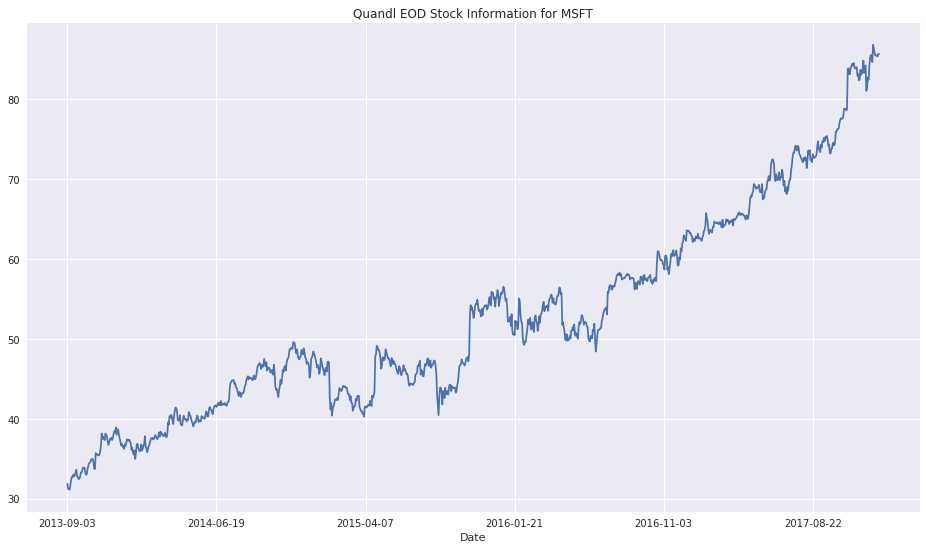

In [19]:
title_string = 'Quandl EOD Stock Information for ' + quandl_dict['dataset']['dataset_code']
stock_quandl['Close'].plot(figsize=(16,9), title=title_string)
plt.show()

### 2.e) IEX Cloud

In [20]:
# Check and see whether the API key is available
# iexcloud_key = os.environ.get('IEXCLOUD_API')
iexcloud_key = "Tsk_7be365b9ca0a4e0eaea2bd427afab760"
if (iexcloud_key==None): sys.exit("API key for IEX Cloud not available. Script Processing Aborted!!!")

iexcloud_url = "https://sandbox.iexapis.com/stable/stock/%s/chart/5y?token=%s" % (stock_symbol, iexcloud_key)

In [21]:
response = requests.get(iexcloud_url)
iex_dict = json.loads(response.text)
print(len(iex_dict), 'data points retrieved from the API call.')
if (verbose): print(iex_dict)

1259 data points retrieved from the API call.


In [22]:
stock_iexcloud = pd.DataFrame(iex_dict)
stock_iexcloud.set_index('date', inplace=True)
stock_iexcloud = stock_iexcloud.sort_index(ascending = True)
stock_iexcloud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 2015-03-25 to 2020-03-24
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   uClose          1259 non-null   float64
 1   uOpen           1259 non-null   float64
 2   uHigh           1259 non-null   float64
 3   uLow            1259 non-null   float64
 4   uVolume         1259 non-null   int64  
 5   close           1259 non-null   float64
 6   open            1259 non-null   float64
 7   high            1259 non-null   float64
 8   low             1259 non-null   float64
 9   volume          1259 non-null   int64  
 10  change          1259 non-null   float64
 11  changePercent   1259 non-null   float64
 12  label           1259 non-null   object 
 13  changeOverTime  1259 non-null   float64
dtypes: float64(11), int64(2), object(1)
memory usage: 147.5+ KB


In [23]:
stock_iexcloud.head(10)

,uClose,uOpen,uHigh,uLow,uVolume,close,open,high,low,volume,change,changePercent,label,changeOverTime
date,,,,,,,,,,,,,,
2015-03-25,41.99,45.05,44.49,41.48,44091634,41.85,44.66,44.96,42.45,43930197,0.000,0.0000,"Mar 25, 15",0.000000
2015-03-26,41.39,41.49,41.78,40.92,38813950,41.41,42.69,42.74,41.62,37839007,-0.260,-0.6120,"Mar 26, 15",-0.006280
2015-03-27,41.43,42.17,41.44,41.25,35888528,41.70,41.65,41.51,41.64,34569584,-0.250,-0.6089,"Mar 27, 15",-0.012374
2015-03-30,42.71,41.80,43.60,42.80,35352876,42.87,41.30,43.12,42.79,36469916,-0.010,-0.0247,"Mar 30, 15",-0.012310
2015-03-31,42.56,42.14,41.97,42.10,36005623,41.23,41.71,41.95,41.13,36360003,-0.307,-0.7817,"Mar 31, 15",-0.019511
2015-04-01,41.62,41.70,41.43,40.62,37793816,40.73,41.60,42.55,40.32,36975568,0.067,0.1669,"Apr 1, 15",-0.018738
2015-04-02,40.87,41.47,42.57,40.60,39084895,40.87,41.81,42.54,41.89,38447983,-0.430,-1.0720,"Apr 2, 15",-0.028990
2015-04-06,43.36,41.95,43.16,40.88,40324233,42.31,41.76,43.50,41.55,40259551,1.310,3.2071,"Apr 6, 15",0.002080
2015-04-07,43.22,42.33,42.12,41.97,28895602,41.98,42.09,42.17,41.98,29506662,-0.016,-0.0371,"Apr 7, 15",0.001758


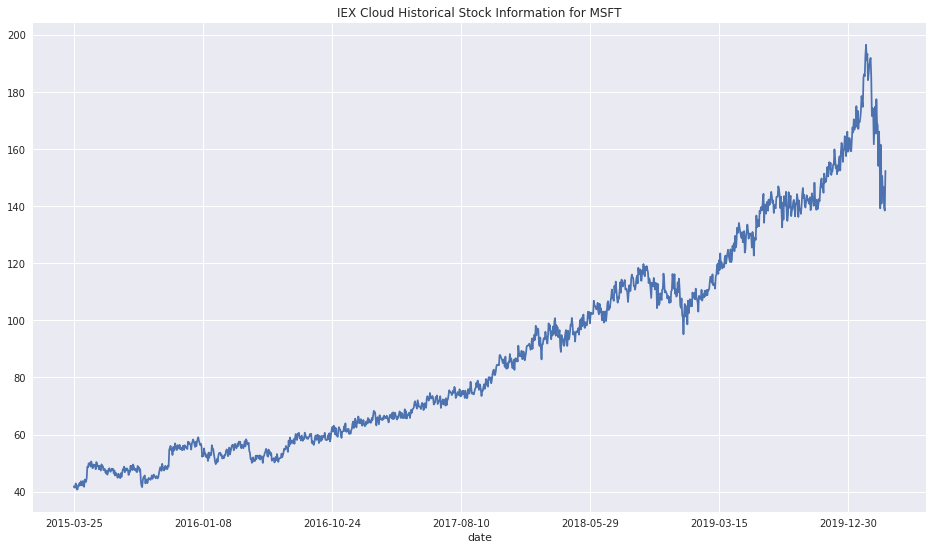

In [24]:
title_string = 'IEX Cloud Historical Stock Information for ' + stock_symbol
stock_iexcloud['close'].plot(figsize=(16,9), title=title_string)
plt.show()

### 2.f) Electronic Data Gathering, Analysis, and Retrieval system (EDGAR)

In [25]:
import edgar
edgar_filing = edgar.Company("MICROSOFT CORP", "0000789019")
tree = edgar_filing.get_all_filings(filing_type = "10-K")
docs = edgar_filing.get_documents(tree, no_of_documents=5)
print(len(docs), "documents retrieved from EDGAR.")

5 documents retrieved from EDGAR.


In [26]:
print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:02:14.709079
